##  ML Final Project - Heart Disease Prediction

## Introduction

The Heart disease is one of the leading causes of death globally. Early identification of individuals at risk, particularly for heart attacks, can significantly improve survival rates by enabling timely interventions and preventive care. With the advancements in machine learning, predictive models can analyze health data and accurately predict heart disease risk, helping medical professionals identify and treat high-risk patients more effectively.
As a data scientist collaborating with healthcare organizations, my goal is to reduce the risk of heart attacks by developing models that can predict which individuals are at high risk. By analyzing health indicators such as blood pressure, cholesterol levels, lifestyle habits, and demographics, we can provide earlier interventions and allocate healthcare resources more effectively.


## Data Summary

- HeartDiseaseorAttack: Indicates if the individual has heart disease or has had a heart attack (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- HighBP: Indicates if the individual has high blood pressure (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- HighChol: Indicates if the individual has high cholesterol (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- CholCheck	Indicates if the individual has had their cholesterol checked (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- BMI: Body Mass Index, a measure of body fat based on height and weight.
  - datatype: Numerical Continuous
- Smoker: Indicates if the individual is a smoker (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- Stroke: Indicates if the individual has had a stroke (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- Diabetes: Indicates if the individual has diabetes (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- PhysActivity: Indicates if the individual engages in physical activity (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- Fruits: Indicates if the individual consumes fruits (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- Veggies: Indicates if the individual consumes vegetables (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- HvyAlcoholConsump: Indicates if the individual consumes alcohol heavily (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- AnyHealthcare: Indicates if the individual has any form of healthcare coverage (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)	
- NoDocbcCost: Indicates if the individual has had no doctor due to cost (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- GenHlth: General health rating (1-5 scale, where 1 = poor and 5 = excellent).
  - datatype: Categorical Ordinal
- MentHlth: Number of days in the past month when mental health was not good.
  - datatype: Numerical Continuous
- PhysHlth: Number of days in the past month when physical health was not good.
  - datatype: Numerical Continuous
- DiffWalk: Indicates if the individual has difficulty walking (1 = Yes, 0 = No).
  - datatype: Categorical (Binary)
- Sex: Gender of the individual (1 = Male, 0 = Female).
  - datatype: Categorical (Binary)
- Age: Age follows scale (1 - 18).
  - datatype: categorical oridnal
- Education: Education level (scale from lower to higher education(1-5)).
  - datatype: Categorical Ordinal
- Income: Income level (scale from low to high income categories(1-5)).
  - datatype: Categorical Ordinal

## Import the libraries

In [91]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings(action="ignore")

## Load the data

In [92]:
# Load the dataset
df = pd.read_csv('C:/Users/venka/OneDrive/Documents/MS Documents/Yeshiva/Program documents/Fall 2024/Machine Learning/Final-Project/2 Data/heart_disease_health_indicators.csv')

# Print the head of the dataset
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


## Check for the nulls

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253661 entries, 0 to 253660
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253661 non-null  int64
 1   HighBP                253661 non-null  int64
 2   HighChol              253661 non-null  int64
 3   CholCheck             253661 non-null  int64
 4   BMI                   253661 non-null  int64
 5   Smoker                253661 non-null  int64
 6   Stroke                253661 non-null  int64
 7   Diabetes              253661 non-null  int64
 8   PhysActivity          253661 non-null  int64
 9   Fruits                253661 non-null  int64
 10  Veggies               253661 non-null  int64
 11  HvyAlcoholConsump     253661 non-null  int64
 12  AnyHealthcare         253661 non-null  int64
 13  NoDocbcCost           253661 non-null  int64
 14  GenHlth               253661 non-null  int64
 15  MentHlth              253661 non-n

## Check for Duplicates

In [94]:
# Check for duplicates
duplicates = df[df.duplicated()]
duplicates

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1242,0,1,1,1,27,1,0,2,0,0,...,1,0,5,0,30,1,0,10,4,5
1563,0,0,0,1,21,1,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
2700,0,0,0,1,32,0,0,0,1,1,...,1,0,2,0,0,0,0,5,6,8
3160,0,0,0,1,21,0,0,0,1,1,...,1,0,1,0,0,0,0,4,6,8
3332,0,0,0,1,24,0,0,0,1,1,...,1,0,1,0,0,0,1,9,6,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253492,0,1,1,1,33,0,0,2,1,1,...,1,0,3,0,0,0,1,9,6,6
253550,0,0,0,1,25,0,0,0,1,1,...,1,0,1,0,0,0,0,7,6,8
253563,0,0,1,1,24,1,0,0,1,1,...,1,0,2,0,0,0,1,8,6,8
253597,0,0,0,1,24,0,0,0,1,1,...,1,0,2,0,0,0,0,5,6,8


## Remove Duplicates

In [95]:
# Remove Duplicates
df = df.drop_duplicates()

In [96]:
# Check for duplicates again
duplicates = df[df.duplicated()]
duplicates

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income


## Descriptive Statistics

In [97]:
# Descriptive statistics of the dataset
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,...,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000,229762.000000
mean,0.103202,0.454431,0.441753,0.959532,28.685818,0.465682,0.044755,0.325611,0.733389,0.612973,...,0.946070,0.092796,2.601144,3.505406,4.675155,0.185505,0.439237,8.086672,4.980593,5.890565
std,0.304224,0.497920,0.496597,0.197054,6.786308,0.498822,0.206766,0.724613,0.442188,0.487071,...,0.225879,0.290147,1.064680,7.713722,9.046547,0.388708,0.496295,3.093792,0.992835,2.092372
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,6.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,4.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Exploaratory Data Analysis

In [98]:
# Print the head of the dataset
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


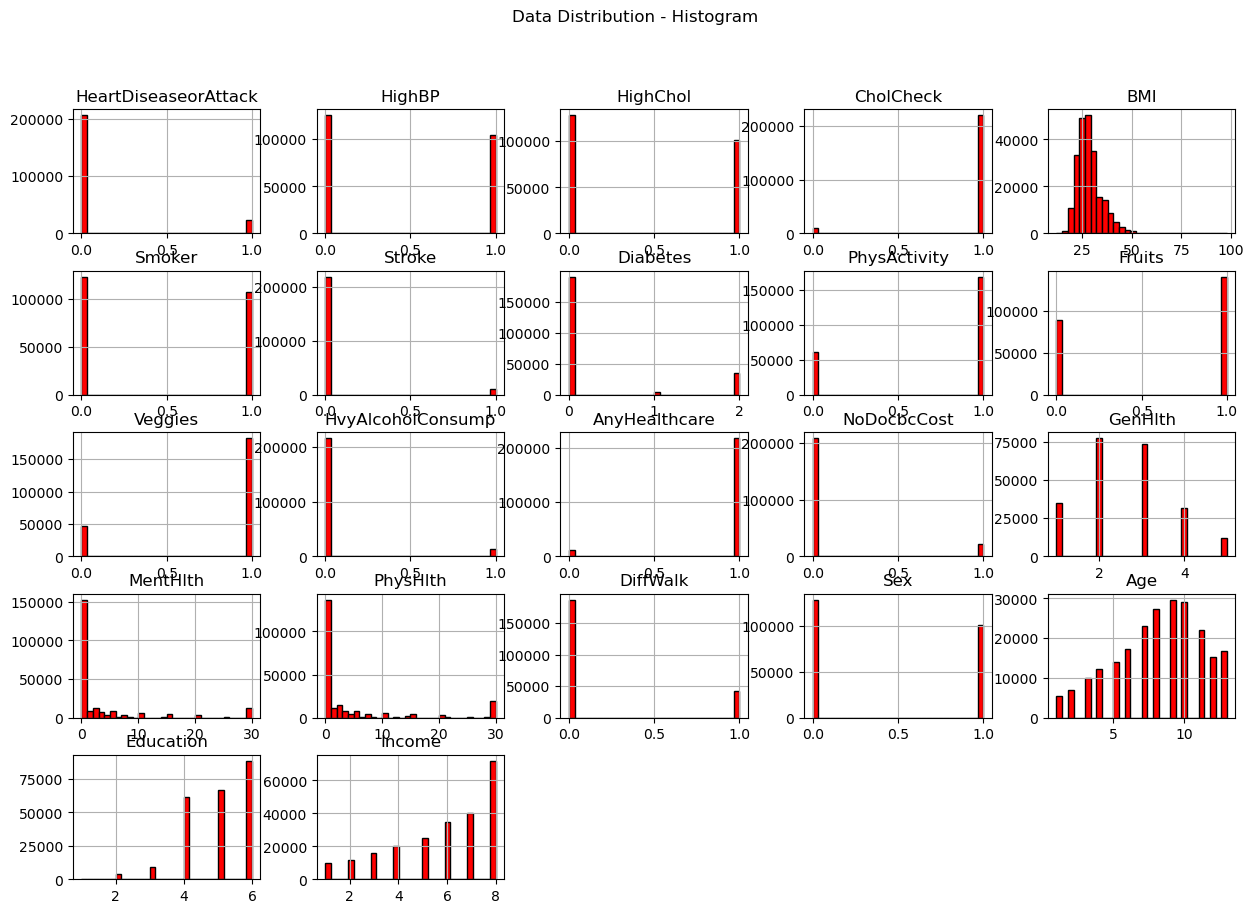

In [99]:
# Plot histograms for dataset
df.hist(bins=30, figsize=(15, 10), color='red', edgecolor='black') 
plt.suptitle('Data Distribution - Histogram')
plt.show()

## Univariate Analysis

## 1. HeartDiseaseorAttack

In [100]:
# Get summary statistics for heartdiseaseorattack
df['HeartDiseaseorAttack'].describe()

count    229762.000000
mean          0.103202
std           0.304224
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: HeartDiseaseorAttack, dtype: float64

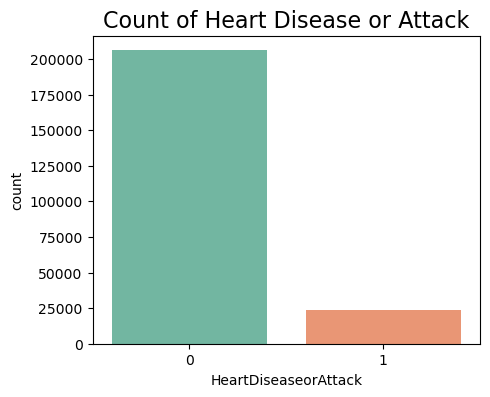

In [101]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='HeartDiseaseorAttack', data=df, hue='HeartDiseaseorAttack', palette='Set2', legend=False)
plt.title('Count of Heart Disease or Attack', fontsize=16)
plt.show()

## 2. High BP

In [102]:
# Get summary statistics for HighBP
df['HighBP'].describe()

count    229762.000000
mean          0.454431
std           0.497920
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: HighBP, dtype: float64

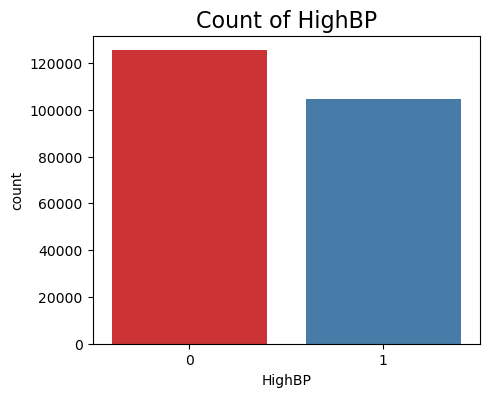

In [103]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='HighBP', data=df, hue='HighBP', palette='Set1', legend=False)
plt.title('Count of HighBP', fontsize=16)
plt.show()

## 3. HightChol

In [104]:
# Get summary statistics for HighChol
df['HighChol'].describe()

count    229762.000000
mean          0.441753
std           0.496597
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: HighChol, dtype: float64

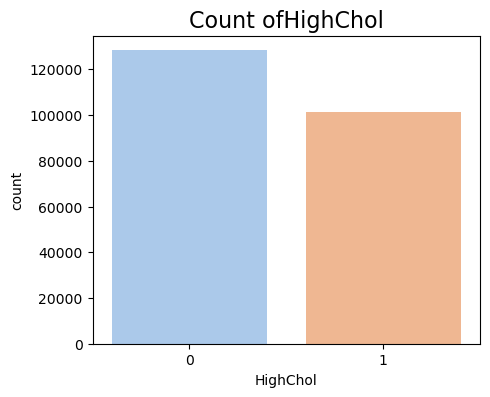

In [105]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='HighChol', data=df, hue='HighChol', palette='pastel', legend=False)
plt.title('Count ofHighChol', fontsize=16)
plt.show()

## 4.CholCheck

In [106]:
# Get summary statistics for CholCheck
df['CholCheck'].describe()

count    229762.000000
mean          0.959532
std           0.197054
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: CholCheck, dtype: float64

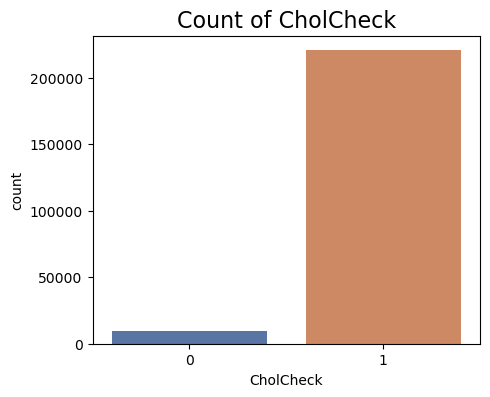

In [107]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='CholCheck', data=df, hue='CholCheck', palette='deep', legend=False)
plt.title('Count of CholCheck', fontsize=16)
plt.show()


## 5.BMI

In [108]:
# Get summary statistics for BMI
df['BMI'].describe()

count    229762.000000
mean         28.685818
std           6.786308
min          12.000000
25%          24.000000
50%          27.000000
75%          32.000000
max          98.000000
Name: BMI, dtype: float64

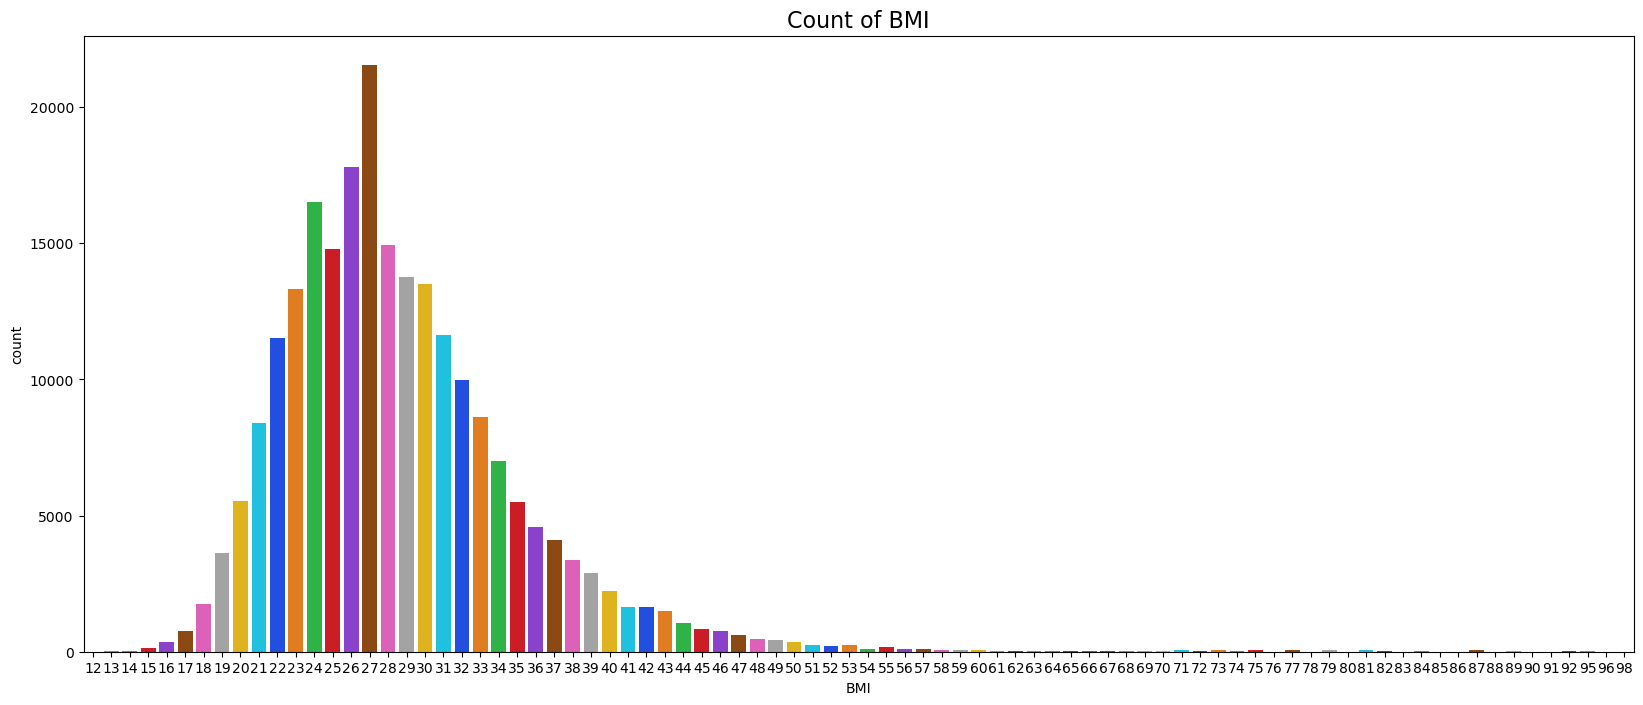

In [109]:
# Create the count plot 
plt.figure(figsize=(20, 8))
sns.countplot(x='BMI', data=df, hue='BMI', palette='bright', legend=False)
plt.title('Count of BMI', fontsize=16)
plt.show()

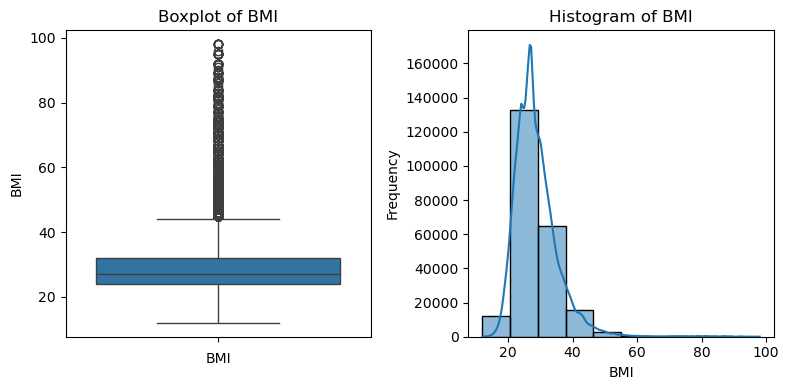

In [110]:
# Plotting for BMI
plt.figure(figsize=(8, 4))

# Box Plot for BMI
plt.subplot(1, 2, 1)
sns.boxplot(y=df['BMI'])
plt.title('Boxplot of BMI')
plt.xlabel('BMI')

# Histogram for BMI
plt.subplot(1, 2, 2)
sns.histplot(df['BMI'], bins=10, kde=True)
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 6.Smoker

In [111]:
# Get summary statistics for Smoker
df['Smoker'].describe()

count    229762.000000
mean          0.465682
std           0.498822
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Smoker, dtype: float64

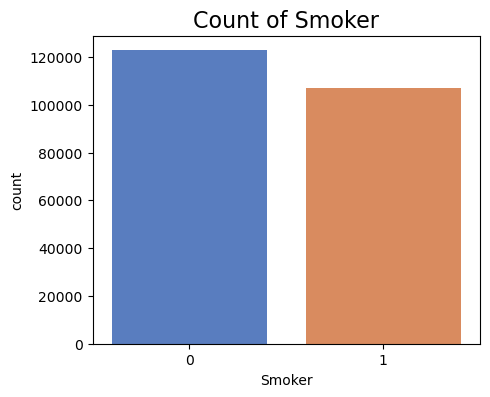

In [112]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='Smoker', data=df, hue='Smoker', palette='muted', legend=False)
plt.title('Count of Smoker', fontsize=16)
plt.show()

## 7. Diabetes

In [113]:
# Get summary statistics for Diabetes
df['Diabetes'].describe()

count    229762.000000
mean          0.325611
std           0.724613
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: Diabetes, dtype: float64

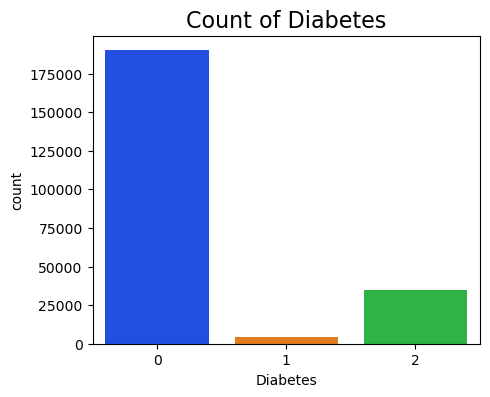

In [114]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='Diabetes', data=df, hue='Diabetes', palette='bright', legend=False)
plt.title('Count of Diabetes', fontsize=16)
plt.show()

## 8. PhysActivity

In [115]:
# Get summary statistics for PhysActivity
df['PhysActivity'].describe()

count    229762.000000
mean          0.733389
std           0.442188
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: PhysActivity, dtype: float64

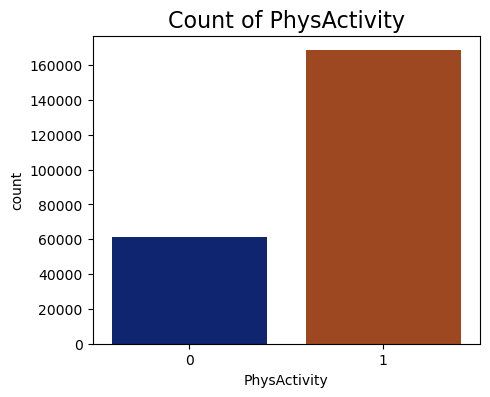

In [116]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='PhysActivity', data=df, hue='PhysActivity', palette='dark', legend=False)
plt.title('Count of PhysActivity', fontsize=16)
plt.show()

## 9. Fruits

In [117]:
# Get summary statistics for Fruits
df['Fruits'].describe()

count    229762.000000
mean          0.612973
std           0.487071
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Fruits, dtype: float64

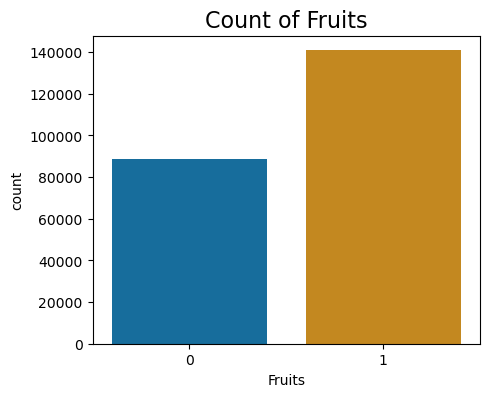

In [118]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='Fruits', data=df, hue='Fruits', palette='colorblind', legend=False)
plt.title('Count of Fruits', fontsize=16)
plt.show()

## 10.Veggies

In [119]:
# Get summary statistics for Veggies
df['Veggies'].describe()

count    229762.000000
mean          0.794831
std           0.403826
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Veggies, dtype: float64

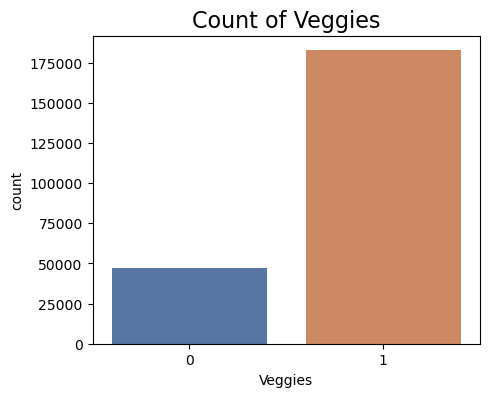

In [120]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='Veggies', data=df, hue='Veggies', palette='deep', legend=False)
plt.title('Count of Veggies', fontsize=16)
plt.show()

## 11. HvyAlcoholConsump

In [121]:
# Get summary statistics for HvyAlcoholConsump
df['HvyAlcoholConsump'].describe()

count    229762.000000
mean          0.060715
std           0.238807
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: HvyAlcoholConsump, dtype: float64

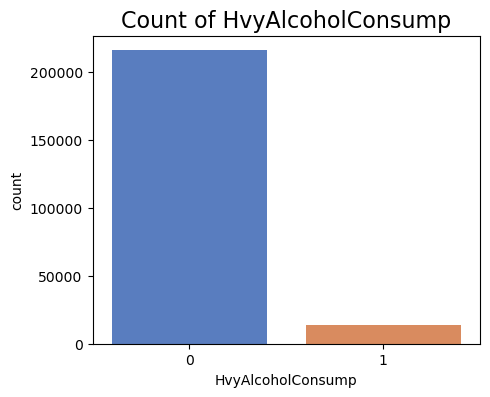

In [122]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='HvyAlcoholConsump', data=df, hue='HvyAlcoholConsump', palette='muted', legend=False)
plt.title('Count of HvyAlcoholConsump', fontsize=16)
plt.show()

## 12. AnyHealthcare

In [123]:
# Get summary statistics for AnyHealthcare
df['AnyHealthcare'].describe()

count    229762.000000
mean          0.946070
std           0.225879
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: AnyHealthcare, dtype: float64

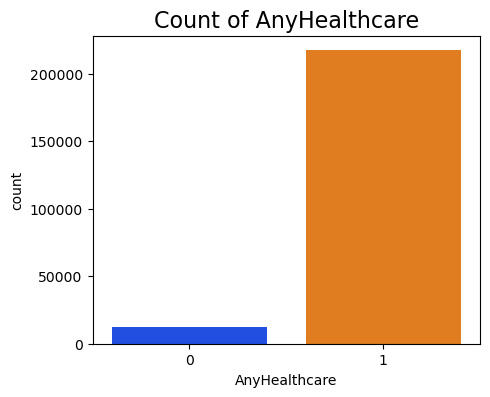

In [124]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='AnyHealthcare', data=df, hue='AnyHealthcare', palette='bright', legend=False)
plt.title('Count of AnyHealthcare', fontsize=16)
plt.show()

## 13. NoDocbcCost

In [125]:
# Get summary statistics for NoDocbcCost
df['NoDocbcCost'].describe()

count    229762.000000
mean          0.092796
std           0.290147
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: NoDocbcCost, dtype: float64

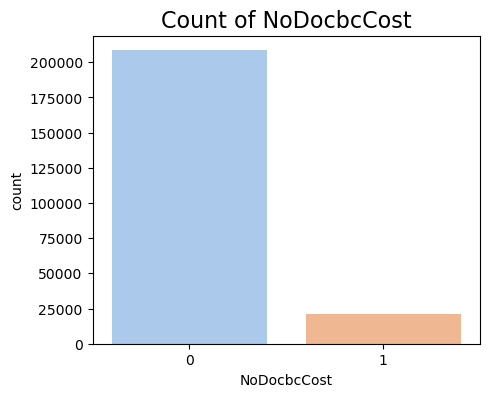

In [126]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='NoDocbcCost', data=df, hue='NoDocbcCost', palette='pastel', legend=False)
plt.title('Count of NoDocbcCost', fontsize=16)
plt.show()

## 14. GenHlth

In [127]:
# Get summary statistics for GenHlth
df['GenHlth'].describe()

count    229762.000000
mean          2.601144
std           1.064680
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           5.000000
Name: GenHlth, dtype: float64

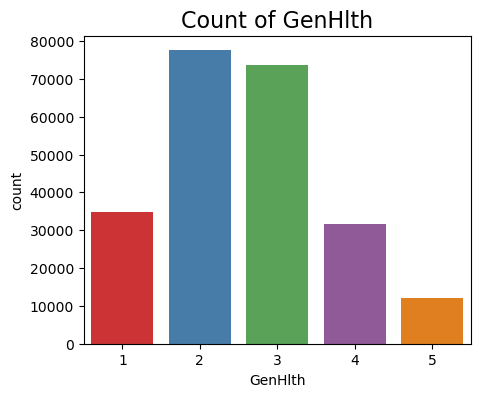

In [128]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='GenHlth', data=df, hue='GenHlth', palette='Set1', legend=False)
plt.title('Count of GenHlth', fontsize=16)
plt.show()

## 15. MentHlth

In [129]:
# Get summary statistics for MentHlth
df['MentHlth'].describe()

count    229762.000000
mean          3.505406
std           7.713722
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max          30.000000
Name: MentHlth, dtype: float64

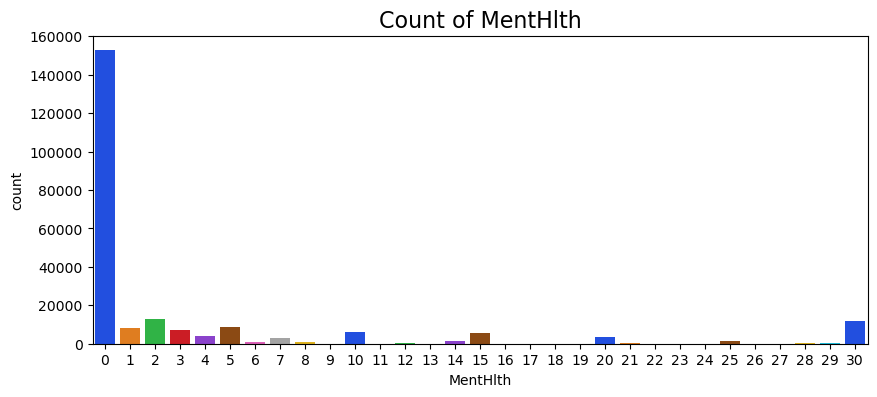

In [130]:
# Create the count plot 
plt.figure(figsize=(10, 4))
sns.countplot(x='MentHlth', data=df, hue='MentHlth', palette='bright', legend=False)
plt.title('Count of MentHlth', fontsize=16)
plt.show()

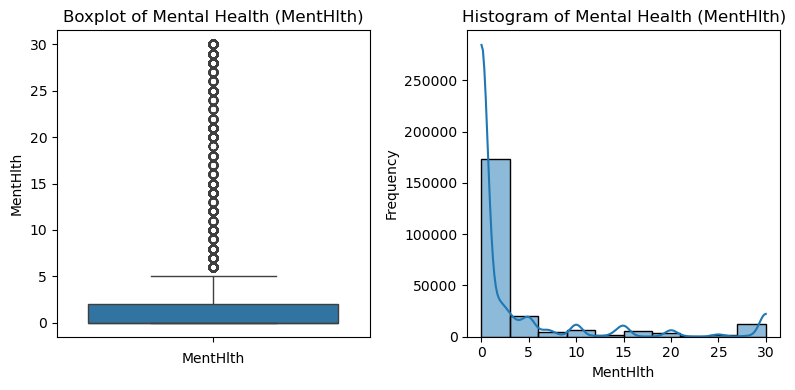

In [131]:
# Plotting for Mental Health (MentHlth)
plt.figure(figsize=(8, 4))

# Box Plot for MentHlth
plt.subplot(1, 2, 1)
sns.boxplot(y=df['MentHlth'])
plt.title('Boxplot of Mental Health (MentHlth)')
plt.xlabel('MentHlth')

# Histogram for MentHlth
plt.subplot(1, 2, 2)
sns.histplot(df['MentHlth'], bins=10, kde=True)
plt.title('Histogram of Mental Health (MentHlth)')
plt.xlabel('MentHlth')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 16. PhysHlth

In [132]:
# Get summary statistics for PhysHlth
df['PhysHlth'].describe()

count    229762.000000
mean          4.675155
std           9.046547
min           0.000000
25%           0.000000
50%           0.000000
75%           4.000000
max          30.000000
Name: PhysHlth, dtype: float64

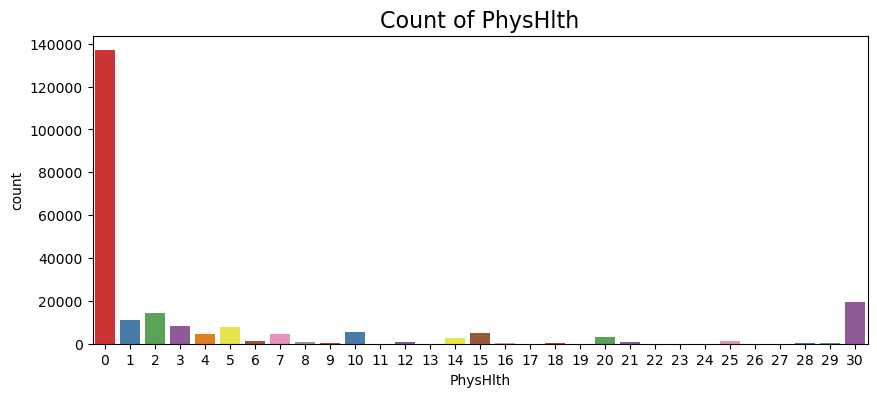

In [133]:
# Create the count plot 
plt.figure(figsize=(10, 4))
sns.countplot(x='PhysHlth', data=df, hue='PhysHlth', palette='Set1', legend=False)
plt.title('Count of PhysHlth', fontsize=16)
plt.show()

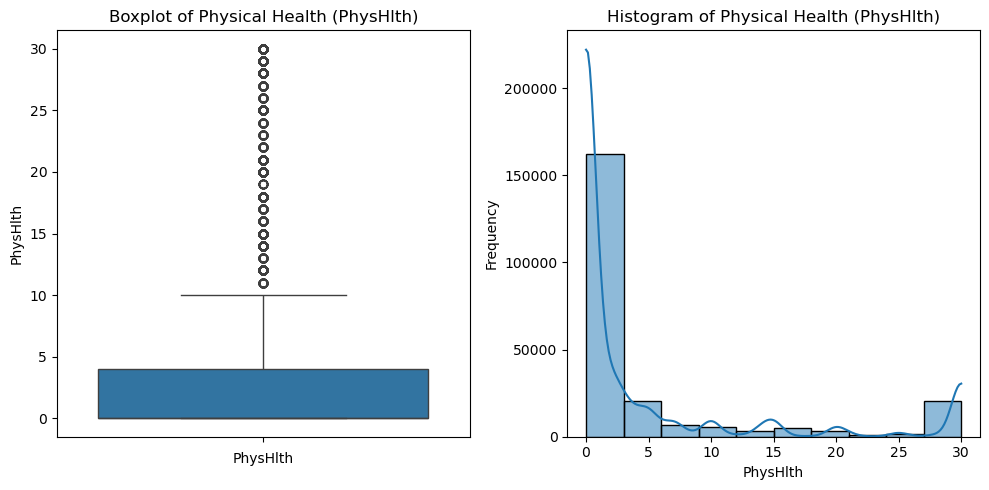

In [134]:
# Plotting for Physical Health (PhysHlth)
plt.figure(figsize=(10, 5))

# Box Plot for PhysHlth
plt.subplot(1, 2, 1)
sns.boxplot(y=df['PhysHlth'])
plt.title('Boxplot of Physical Health (PhysHlth)')
plt.xlabel('PhysHlth')

# Histogram for PhysHlth
plt.subplot(1, 2, 2)
sns.histplot(df['PhysHlth'], bins=10, kde=True)
plt.title('Histogram of Physical Health (PhysHlth)')
plt.xlabel('PhysHlth')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 17. DiffWalk

In [135]:
# Get summary statistics for DiffWalk
df['DiffWalk'].describe()

count    229762.000000
mean          0.185505
std           0.388708
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: DiffWalk, dtype: float64

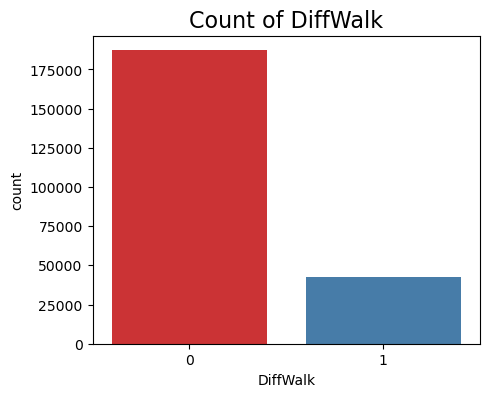

In [136]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='DiffWalk', data=df, hue='DiffWalk', palette='Set1', legend=False)
plt.title('Count of DiffWalk', fontsize=16)
plt.show()

## 18. Sex

In [137]:
# Get summary statistics for sex
df['Sex'].describe()

count    229762.000000
mean          0.439237
std           0.496295
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Sex, dtype: float64

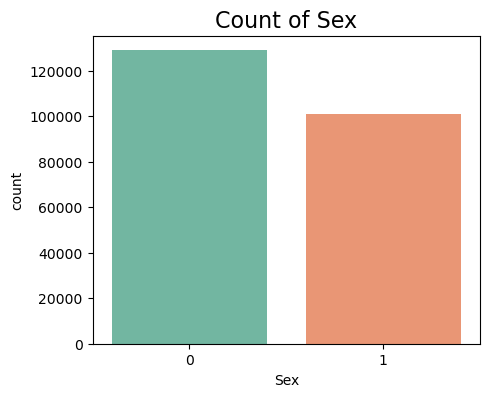

In [138]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='Sex', data=df, hue='Sex', palette='Set2', legend=False)
plt.title('Count of Sex', fontsize=16)
plt.show()

## 19. Age

In [139]:
# Get summary statistics for Age
df['Age'].describe()

count    229762.000000
mean          8.086672
std           3.093792
min           1.000000
25%           6.000000
50%           8.000000
75%          10.000000
max          13.000000
Name: Age, dtype: float64

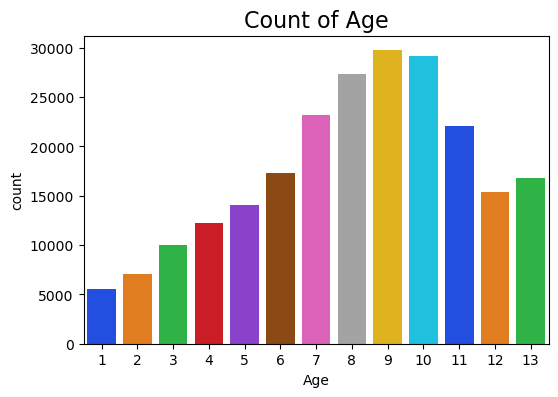

In [140]:
# Create the count plot 
plt.figure(figsize=(6, 4))
sns.countplot(x='Age', data=df, hue='Age', palette='bright', legend=False)
plt.title('Count of Age', fontsize=16)
plt.show()

## 20. Education

In [141]:
# Get summary statistics for Education
df['Education'].describe()

count    229762.000000
mean          4.980593
std           0.992835
min           1.000000
25%           4.000000
50%           5.000000
75%           6.000000
max           6.000000
Name: Education, dtype: float64

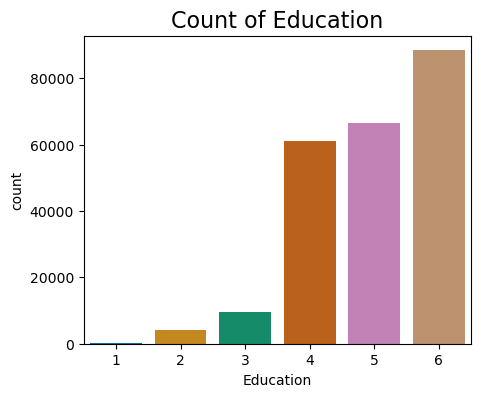

In [142]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='Education', data=df, hue='Education', palette='colorblind', legend=False)
plt.title('Count of Education', fontsize=16)
plt.show()

## 21. Income

In [143]:
# Get summary statistics for Income
df['Income'].describe()

count    229762.000000
mean          5.890565
std           2.092372
min           1.000000
25%           5.000000
50%           6.000000
75%           8.000000
max           8.000000
Name: Income, dtype: float64

In [ ]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='Income', data=df, hue='Income', palette='bright', legend=False)
plt.title('Count of Income', fontsize=16)
plt.show()

## 22. stroke

In [ ]:
# Get summary statistics for stroke
df['Stroke'].describe()

In [ ]:
# Create the count plot 
plt.figure(figsize=(5, 4))
sns.countplot(x='Stroke', data=df, hue='Stroke', palette='colorblind', legend=False)
plt.title('Count of stroke', fontsize=16)
plt.show()

## Bivariate Analysis

## 1.Heartdisease and highchol

In [ ]:
CrosstabResult = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['HighChol'])

# Create the bar plot
ax = CrosstabResult.plot.bar(figsize=(7, 4), rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. High Cholesterol', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# add a legend title
plt.legend(title='High Cholesterol (0 = No, 1 = Yes)', fontsize=10)

# Show the plot
plt.tight_layout()  
plt.show()

## 2.Heartdisease and highBP

In [ ]:
CrosstabResult = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['HighBP'])

# Create the bar plot
ax = CrosstabResult.plot.bar(figsize=(7, 4), rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. High Blood Pressure', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Optionally, add a legend title
plt.legend(title='High Blood Pressure (0 = No, 1 = Yes)', fontsize=10)

# Show the plot
plt.tight_layout()  
plt.show()

## 3. Heart Disease and Physical Activity

In [ ]:
# Create the crosstab for HeartDiseaseorAttack and PhysActivity
CrosstabResult = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['PhysActivity'])

# Create the bar plot
plt.figure(figsize=(7, 4))
ax = CrosstabResult.plot.bar(rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. Physical Activity', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Optionally, add a legend title
plt.legend(title='Physical Activity (0 = No, 1 = Yes)', fontsize=10)

# Show the plot
plt.tight_layout() 
plt.show()

## 4. Heart Disease and Smoker

In [ ]:
# Create the crosstab for HeartDiseaseorAttack and Smoker
CrosstabResult = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['Smoker'])

# Create the bar plot
plt.figure(figsize=(7, 4))
ax = CrosstabResult.plot.bar(rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. Smoking Status', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Optionally, add a legend title
plt.legend(title='Smoker (0 = No, 1 = Yes)', fontsize=10)

# Show the plot
plt.tight_layout()  
plt.show()

## 5. Heart Disease and Age

In [ ]:
# Create the box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='HeartDiseaseorAttack', y='Age', data=df)

# Add title and axes labels
plt.title('Age Distribution by Heart Disease or Attack', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Age', fontsize=12)

# Show the plot
plt.tight_layout() 
plt.show()

## 6. Heart Disease and Sex

In [ ]:
# Create a crosstab for HeartDiseaseorAttack and Sex
CrosstabSex = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['Sex'])

# Create the bar plot
plt.figure(figsize=(10, 4))
ax = CrosstabSex.plot.bar(rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. Sex', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend title
plt.legend(title='Sex (0 = Female, 1 = Male)', fontsize=10)

# Show the plot
plt.tight_layout()  
plt.show()

## 7. Heart Disease and Heavy Alcohol Consumption

In [ ]:
# Create a crosstab for HeartDiseaseorAttack and HvyAlcoholConsump
CrosstabAlcohol = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['HvyAlcoholConsump'])

# Create the bar plot
plt.figure(figsize=(10, 4))
ax = CrosstabAlcohol.plot.bar(rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. Heavy Alcohol Consumption', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend title
plt.legend(title='Heavy Alcohol Consumption (0 = No, 1 = Yes)', fontsize=10)

# Show the plot
plt.tight_layout()  
plt.show()

## 8. Heart Disease and Income

In [ ]:
# Create the crosstab for HeartDiseaseorAttack and Income
CrosstabIncome = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['Income'])

# Create the bar plot
plt.figure(figsize=(10, 4))
ax = CrosstabIncome.plot.bar(rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. Income Level', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend title
plt.legend(title='Income Level', fontsize=10)

# Show the plot
plt.tight_layout()  
plt.show()

## 9. Heart Disease and Education

In [ ]:
# Create the crosstab for HeartDiseaseorAttack and Education
CrosstabEducation = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['Education'])

# Create the bar plot
plt.figure(figsize=(10, 4))
ax = CrosstabEducation.plot.bar(rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. Education Level', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend title
plt.legend(title='Education Level', fontsize=10)

# Show the plot
plt.tight_layout()  
plt.show()

## 11. Heart Disease and Anyhealthcare

In [ ]:
# Create a crosstab for HeartDiseaseorAttack and HvyAlcoholConsump
CrosstabAlcohol = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['AnyHealthcare'])

# Create the bar plot
plt.figure(figsize=(10, 4))
ax = CrosstabAlcohol.plot.bar(rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. Any Health Care', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend title
plt.legend(title='Any Health Care (0 = No, 1 = Yes)', fontsize=10)

# Show the plot
plt.tight_layout()  
plt.show()

## 12. Heart Disease and No doctor because of cost

In [ ]:
# Create a crosstab for HeartDiseaseorAttack and HvyAlcoholConsump
CrosstabAlcohol = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['NoDocbcCost'])

# Create the bar plot
plt.figure(figsize=(10, 4))
ax = CrosstabAlcohol.plot.bar(rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. No Doctor because of cost', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend title
plt.legend(title='No doctor because of cost (0 = No, 1 = Yes)', fontsize=10)

# Show the plot
plt.tight_layout()  
plt.show()

## 13. Heart Disease and Cholestrol Check

In [ ]:
# Create a crosstab for HeartDiseaseorAttack and HvyAlcoholConsump
CrosstabAlcohol = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['CholCheck'])

# Create the bar plot
plt.figure(figsize=(10, 4))
ax = CrosstabAlcohol.plot.bar(rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. Cholestrol Check', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend title
plt.legend(title='Cholestrok Check (0 = No, 1 = Yes)', fontsize=10)

# Show the plot
plt.tight_layout()  
plt.show()

## 14. Heart Disease and Veggies

In [ ]:
# Create a crosstab for HeartDiseaseorAttack and HvyAlcoholConsump
CrosstabAlcohol = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['Veggies'])

# Create the bar plot
plt.figure(figsize=(10, 4))
ax = CrosstabAlcohol.plot.bar(rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. Veggies', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend title
plt.legend(title='Veggies (0 = No, 1 = Yes)', fontsize=10)

# Show the plot
plt.tight_layout()  
plt.show()

## HeartAttack and Fruits

In [ ]:
# Create a crosstab for HeartDiseaseorAttack and HvyAlcoholConsump
CrosstabAlcohol = pd.crosstab(index=df['HeartDiseaseorAttack'], columns=df['Fruits'])

# Create the bar plot
plt.figure(figsize=(10, 4))
ax = CrosstabAlcohol.plot.bar(rot=0)

# Add title and axes labels
plt.title('Heart Disease or Attack vs. Fruits', fontsize=14)
plt.xlabel('Heart Disease or Attack (0 = No, 1 = Yes)', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Add legend title
plt.legend(title='Fruits (0 = No, 1 = Yes)', fontsize=10)

# Show the plot
plt.tight_layout()  
plt.show()

## Multivariate Analysis

## 1. Heart Disease , High BP and High Cholestrol

In [ ]:
# Filter relevant columns and group data
df_filtered = df[['HeartDiseaseorAttack', 'HighBP', 'HighChol']]
grouped_data = df_filtered.groupby(['HeartDiseaseorAttack', 'HighBP', 'HighChol']).size().reset_index(name='Count')

# Pivot data to create a column chart format
pivot_data = grouped_data.pivot_table(
    index=['HighBP', 'HighChol'],
    columns='HeartDiseaseorAttack',
    values='Count'
).fillna(0)

# Rename columns for clarity
pivot_data.columns = ['No Heart Attack', 'Heart Attack']

# Plot the data as a bar plot
pivot_data.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'], figsize=(10, 4))

# Add titles and labels
plt.title("Heart Attack Occurrence by High Blood Pressure and High Cholesterol", fontsize=14)
plt.xlabel("High Blood Pressure and High Cholesterol (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Heart Attack Status")

# Display plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## 2. Heart Disease , Income and High Education

In [ ]:
# Define labels for income levels
income_labels = [
    '1: Less than $10,000', '2: $10,000 to $15,000', 
    '3: $15,000 to $20,000', '4: $20,000 to $25,000', 
    '5: $25,000 to $35,000', '6: $35,000 to $50,000', 
    '7: $50,000 to $75,000', '8: $75,000 or more'
]

# Crosstab for Heart Disease, Education, and Income
crosstab_data = pd.crosstab(index=[df['HeartDiseaseorAttack'], df['Education']], columns=df['Income'])

# Plotting
plt.figure(figsize=(14, 8))
crosstab_data.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 4))

# Add titles and labels
plt.title('Heart Disease or Attack vs Education Level and Income Level', fontsize=16)
plt.xlabel('Heart Disease or Attack and Income Levels', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Education Level (0 = No schooling, 6 = 4+ years of college)', title_fontsize='13', fontsize='10')

# Show plot
plt.tight_layout()
plt.show()

## Feature Engineering

## Standardization

In [ ]:
# Define numerical, ordinal, and categorical columns
numerical_features = ['BMI', 'MentHlth', 'PhysHlth']
ordinal_features = ['GenHlth', 'Education', 'Income', 'Age']  
categorical_features = ['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
                        'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
                        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex',]  

# Ensure ordinal features are treated as integers
df[ordinal_features] = df[ordinal_features].astype(int)

# Pipeline for numerical features
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Pipeline for ordinal features
ordinal_pipeline = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])

# Pipeline for categorical features
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('ord', ordinal_pipeline, ordinal_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Apply transformations
X = preprocessor.fit_transform(df)

# Get feature names
numerical_names = numerical_features
ordinal_names = ordinal_features
categorical_names = list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))

feature_names = numerical_names + ordinal_names + categorical_names

# Convert to DataFrame for better readability
df = pd.DataFrame(X, columns=feature_names)

# Display transformed features
df.head()

## Over Sampling

In [ ]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['HeartDiseaseorAttack_1'])
y = df['HeartDiseaseorAttack_1']

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert resampled data back to pandas DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_series = pd.Series(y_resampled, name=y.name)
resampled_df = pd.concat([X_resampled_df, y_resampled_series], axis=1)

## New Dataset info

In [ ]:
resampled_df.info()

## Check for duplicates after Sampling

In [ ]:
# Check for duplictes
duplicates = resampled_df[resampled_df.duplicated()]
duplicates

## Remove Duplicates after Sampling

In [ ]:
# Drop the duplicates
resampled_df = resampled_df.drop_duplicates()

In [ ]:
# Check agaim
duplicates = resampled_df[resampled_df.duplicated()]
duplicates

## Check the Imbalancing after Sampling

In [ ]:
# Plot heartdiseaseorAttack to check imbalancing
sns.countplot(data=resampled_df,x='HeartDiseaseorAttack_1')

In [ ]:
# Removing unnecessary columns
X=resampled_df.drop(columns=['HeartDiseaseorAttack_1','CholCheck_1','AnyHealthcare_1','HvyAlcoholConsump_1','NoDocbcCost_1'])
y=resampled_df['HeartDiseaseorAttack_1']

#### Comment:
- From Exploratory data analysis, remove the unnecessary columns 'Cholcheck', 'AnyHealthcare', 'HvyAlcoholConsump', 'NoDocbcCost' those dont impact the target variable

## Model Building & Evaluation

## Split the Data

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#### Comment:
- Split the data into training and testing

## Naive Bayes

In [ ]:
# Take the Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the model on the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Naive bayes model: {accuracy}")

# Calculate ROC-AUC score
roc_auc_nb = roc_auc_score(y_test, nb_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC of the Naive Bayes model: {roc_auc_nb}")

# Define target names 
target_names = ['No Heart Disease', 'Heart Disease']

# Print classification report
print(classification_report(y_test, y_pred.reshape(-1, 1), target_names=target_names))

# Compute confusion matrix
cm_naive = confusion_matrix(y_test, y_pred.reshape(-1, 1), normalize='true')
print(cm_naive)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_naive, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

#### Commnet:

### Naive Bayes Model Performance

The Naive Bayes model has an accuracy of **71.50%** and a ROC-AUC score of **0.80**, showing it can distinguish between heart disease and no heart disease effectively.
- **Precision**:
- No Heart Disease: **69%** (Out of those predicted as "No Heart Disease," 69% were correct)
- Heart Disease: **75%** (Out of those predicted as "Heart Disease," 75% were correct)
- **Recall**:
- No Heart Disease: **78%** (Out of all actual "No Heart Disease" cases, 78% were correctly identified)
- Heart Disease: **65%** (Out of all actual "Heart Disease" cases, 65% were correctly identified)
- **F1-Score**:
- No Heart Disease: **73%** (A balance between precision and recall for "No Heart Disease")
- Heart Disease: **70%** (A balance between precision and recall for "Heart Disease")
- With a total of **82,420** predictions, the macro and weighted averages for precision, recall, and F1-score are around **0.72** to **0.71**, indicating balanced performance. The confusion matrix highlights some misclassifications of heart disease cases.

## Decision Tree

In [ ]:
# Instantiate the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Decision Tree model: {accuracy}")

# Calculate ROC-AUC score
roc_auc_dt = roc_auc_score(y_test, dt_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC of the Decision Tree model: {roc_auc_dt}")

# Define target names (adjust based on your dataset)
target_names = ['No Heart Disease', 'Heart Disease']

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

# Compute confusion matrix
cm_decisiontree = confusion_matrix(y_test, y_pred, normalize='true')
print(cm_decisiontree)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_decisiontree, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for Decision Tree")
plt.show()

#### Comment:

### Decision Tree Model Performance

The Decision Tree model has an accuracy of **90.06%** and a ROC-AUC score of **0.90**, indicating strong performance in distinguishing between heart disease and no heart disease.
- **Precision**:
- No Heart Disease: **91%** (Out of those predicted as "No Heart Disease," 91% were correct)
- Heart Disease: **90%** (Out of those predicted as "Heart Disease," 90% were correct)
- **Recall**:
- No Heart Disease: **89%** (Out of all actual "No Heart Disease" cases, 89% were correctly identified)
- Heart Disease: **91%** (Out of all actual "Heart Disease" cases, 91% were correctly identified)
- **F1-Score**:
- No Heart Disease: **90%** (A balance between precision and recall for "No Heart Disease")
-  Heart Disease: **90%** (A balance between precision and recall for "Heart Disease")
- With a total of **82,420** predictions, the macro and weighted averages for precision, recall, and F1-score are around **0.90**, indicating balanced performance. The confusion matrix suggests minimal misclassifications.

## Logistic Regression

In [ ]:
# Instantiate the Logistic Regression classifier
log_reg_classifier = LogisticRegression(max_iter=1000)  

# Fit the model on the training data
log_reg_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Logistic Regression model: {accuracy}")

# Calculate ROC-AUC score
roc_auc_lr = roc_auc_score(y_test, log_reg_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC of the Logistic Regression model: {roc_auc_lr}")

# Define target names (adjust based on your dataset)
target_names = ['No Heart Disease', 'Heart Disease']

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

# Compute confusion matrix
cm_lr = confusion_matrix(y_test, y_pred, normalize='true')
print(cm_lr)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

#### Comment:

### Logistic Regression Model Performance

The Logistic Regression model has an accuracy of **76.47%** and a ROC-AUC score of **0.84**, indicating a good ability to distinguish between heart disease and no heart disease.
- **Precision**:
- No Heart Disease: **78%** (Out of those predicted as "No Heart Disease," 78% were correct)
- Heart Disease: **75%** (Out of those predicted as "Heart Disease," 75% were correct)
- **Recall**:
- No Heart Disease: **74%** (Out of all actual "No Heart Disease" cases, 74% were correctly identified)
- Heart Disease: **79%** (Out of all actual "Heart Disease" cases, 79% were correctly identified)
- **F1-Score**:
- No Heart Disease: **76%** (A balance between precision and recall for "No Heart Disease")
- Heart Disease: **77%** (A balance between precision and recall for "Heart Disease")
- With a total of **82,420** predictions, the macro and weighted averages for precision, recall, and F1-score are around **0.77** to **0.76**, indicating balanced performance. The confusion matrix shows some misclassifications of heart disease cases.

## Random Forest

In [ ]:
# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy}")

# Calculate ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC of the Random Forest model: {roc_auc_rf}")

# Define target names (adjust based on your dataset)
target_names = ['No Heart Disease', 'Heart Disease']

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred, normalize='true')
print(cm_rf)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.show()

### Random Forest Model Performance

The Random Forest model achieved an accuracy of **94.08%** and a ROC-AUC score of **0.98**, indicating its strong ability to distinguish between heart disease and no heart disease.

- **Precision**:
- No Heart Disease: **92%** (Out of those predicted as "No Heart Disease," 92% were correct)
- Heart Disease: **96%** (Out of those predicted as "Heart Disease," 96% were correct)

- **Recall**:
- No Heart Disease: **96%** (Out of all actual "No Heart Disease" cases, 96% were correctly identified)
- Heart Disease: **92%** (Out of all actual "Heart Disease" cases, 92% were correctly identified)

- **F1-Score**:
- No Heart Disease: **94%** (A balance between precision and recall for "No Heart Disease")
- Heart Disease: **94%** (A balance between precision and recall for "Heart Disease")

- With a total of **82,420** predictions, the macro and weighted averages for precision, recall, and F1-score are all approximately **0.94**, indicating consistent performance across both classes. The confusion matrix reveals the model's effectiveness in minimizing misclassifications.

## Gradient Boost

In [ ]:
# Instantiate the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Fit the model on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Gradient Boosting model: {accuracy}")

# Calculate ROC-AUC score
roc_auc_gb = roc_auc_score(y_test, gb_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC of the Gradient Boosting model: {roc_auc_gb}")

# Define target names (adjust based on your dataset)
target_names = ['No Heart Disease', 'Heart Disease']

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

# Compute confusion matrix
cm_gb = confusion_matrix(y_test, y_pred, normalize='true')
print(cm_gb)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for Gradient Boosting")
plt.show()

#### Comment:

### Gradient Boosting Model Performance

The Gradient Boosting model has an accuracy of **89.48%** and a ROC-AUC score of **0.96**, demonstrating a strong ability to distinguish between heart disease and no heart disease.
- **Precision**:
  - No Heart Disease: **90%** (Out of those predicted as "No Heart Disease," 90% were correct)
  - Heart Disease: **89%** (Out of those predicted as "Heart Disease," 89% were correct)
- **Recall**:
  - No Heart Disease: **89%** (Out of all actual "No Heart Disease" cases, 89% were correctly identified)
  - Heart Disease: **90%** (Out of all actual "Heart Disease" cases, 90% were correctly identified)
- **F1-Score**:
  - No Heart Disease: **89%** (A balance between precision and recall for "No Heart Disease")
  - Heart Disease: **90%** (A balance between precision and recall for "Heart Disease")
- With a total of **82,420** predictions, the macro and weighted averages for precision, recall, and F1-score are around **0.89**, indicating balanced performance. The confusion matrix reflects minimal misclassifications of heart disease cases.

## XGBoost

In [ ]:
# Instantiate the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Fit the model on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the XGBoost model: {accuracy}")

# Calculate ROC-AUC score
roc_auc_xgb = roc_auc_score(y_test, xgb_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC of the XGBoost model: {roc_auc_xgb}")

# Define target names (adjust based on your dataset)
target_names = ['No Heart Disease', 'Heart Disease']

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

# Compute confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred, normalize='true')
print(cm_xgb)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for XGBoost")
plt.show()

#### Comment:

### XGBoost Model Performance

The XGBoost model has an accuracy of **93.87%** and a ROC-AUC score of **0.98**, indicating excellent capability in distinguishing between heart disease and no heart disease.
- **Precision**:
  - No Heart Disease: **90%** (Out of those predicted as "No Heart Disease," 90% were correct)
  - Heart Disease: **98%** (Out of those predicted as "Heart Disease," 98% were correct)
- **Recall**:
  - No Heart Disease: **99%** (Out of all actual "No Heart Disease" cases, 99% were correctly identified)
  - Heart Disease: **89%** (Out of all actual "Heart Disease" cases, 89% were correctly identified)
- **F1-Score**:
  - No Heart Disease: **94%** (A balance between precision and recall for "No Heart Disease")
  - Heart Disease: **94%** (A balance between precision and recall for "Heart Disease")
- With a total of **82,420** predictions, the macro and weighted averages for precision, recall, and F1-score are around **0.94**, indicating balanced performance. The confusion matrix shows a high rate of correct classifications, especially for "No Heart Disease."

## Hyper Parameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define a more expanded parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Include more trees
    'max_depth': [None, 10, 20, 30, 40],  # Add more depth options
    'max_features': ['sqrt', 'log2'],  # Test log2 as well for feature selection
    'criterion': ['entropy'],  # Use entropy criterion
    'bootstrap': [True, False]                
}

# Set up the randomized search with more iterations
random_search = RandomizedSearchCV(
    estimator=rf_model, 
    param_distributions=param_grid, 
    n_iter=20,  # Increased number of combinatios to try
    scoring='accuracy',  # Metric to optimize
    cv=5,  # 5-fold cross-validation for better generalization
    verbose=1, 
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the randomized search to your data
random_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

In [ ]:
# Use the best estimator from the random search
best_rf_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Compute confusion matrix
cm_gb = confusion_matrix(y_test, y_pred, normalize='true')
print(cm_gb)

# Print them
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


# Print classification report for a more detailed breakdown
print("\nClassification Report:\n", classification_report(y_test, y_pred))


## Impact of Hyperparameter Tuning
- Despite applying extensive hyperparameter tuning, the improvements in accuracy, precision, recall, and F1 score were minimal. Tuning did not significantly enhance the model's performance; therefore, the original model, without tuning, will be retained as it offers comparable results with less complexity.

## Final Model - Random Forest

In [ ]:
# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest model: {accuracy}")

# Calculate ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, rf_classifier.predict_proba(X_test)[:, 1])
print(f"ROC-AUC of the Random Forest model: {roc_auc_rf}")

# Define target names (adjust based on your dataset)
target_names = ['No Heart Disease', 'Heart Disease']

# Print classification report
print(classification_report(y_test, y_pred, target_names=target_names))

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred, normalize='true')
print(cm_rf)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=target_names)
fig, ax = plt.subplots(figsize=(5, 3))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for Random Forest")
plt.show()

## Conclusion
- After testing multiple models, I selected Random Forest for its high accuracy and excellent ROC-AUC, ensuring reliable predictions. Future improvements could involve neural networks and a user-friendly interface. Overall, the Random Forest model is recommended for effective heart disease risk prediction, offering valuable insights for preventive care.